### **Data Collection**

In [148]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [230]:
data = pd.read_csv(r"c:\Users\bobby\Desktop\Python\Projects_DataSets\Project_1\olist_data.csv", encoding = 'windows-1252')
data.head()

,order_id,product_id,seller_id,customer_id,city,country_sate,lat,long,order_purchase_timestamp,order_delivered_customer_date,product_category_name,product_weight_g,order_status,review_score,total_sales,payment_type,payment_value
0,7eba0b6b5cb480d65416e26e2528d250,5fea1628f3d9680db59c20a4d80c221f,0761743cbffb25d7148189e9f1a5f03a,7b27139522c36a37118d6eb8402f1d85,Taboao da Serra,Sao Paulo,-23.6261,-46.7917,2017-11-30 09:38:21.0000000,2017-12-15 23:09:59.0000000,beleza_saude,400.0,delivered,4.0,47.01,boleto,235.050003
1,7eba0b6b5cb480d65416e26e2528d250,5fea1628f3d9680db59c20a4d80c221f,0761743cbffb25d7148189e9f1a5f03a,7b27139522c36a37118d6eb8402f1d85,Taboao da Serra,Sao Paulo,-23.6261,-46.7917,2017-11-30 09:38:21.0000000,2017-12-15 23:09:59.0000000,beleza_saude,400.0,delivered,4.0,47.01,boleto,235.050003
2,7eba0b6b5cb480d65416e26e2528d250,5fea1628f3d9680db59c20a4d80c221f,0761743cbffb25d7148189e9f1a5f03a,7b27139522c36a37118d6eb8402f1d85,Taboao da Serra,Sao Paulo,-23.6261,-46.7917,2017-11-30 09:38:21.0000000,2017-12-15 23:09:59.0000000,beleza_saude,400.0,delivered,4.0,47.01,boleto,235.050003
3,7eba0b6b5cb480d65416e26e2528d250,5fea1628f3d9680db59c20a4d80c221f,0761743cbffb25d7148189e9f1a5f03a,7b27139522c36a37118d6eb8402f1d85,Taboao da Serra,Sao Paulo,-23.6261,-46.7917,2017-11-30 09:38:21.0000000,2017-12-15 23:09:59.0000000,beleza_saude,400.0,delivered,4.0,47.01,boleto,235.050003
4,7eba0b6b5cb480d65416e26e2528d250,5fea1628f3d9680db59c20a4d80c221f,0761743cbffb25d7148189e9f1a5f03a,7b27139522c36a37118d6eb8402f1d85,Taboao da Serra,Sao Paulo,-23.6261,-46.7917,2017-11-30 09:38:21.0000000,2017-12-15 23:09:59.0000000,beleza_saude,400.0,delivered,4.0,47.01,boleto,235.050003


In [231]:
data.columns

Index(['order_id', 'product_id', 'seller_id', 'customer_id', 'city',
       'country_sate', 'lat', 'long', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'product_category_name',
       'product_weight_g', 'order_status', 'review_score', 'total_sales',
       'payment_type', 'payment_value'],
      dtype='object')

In [232]:
data.columns = data.columns.str.replace('_', ' ') # replace _ with space
data.columns = data.columns.str.title() # capitalize each word in the column title

In [233]:
data['Product Category Name'] = data['Product Category Name'].str.replace('_', ' ')
data['Order Status'] = data['Order Status'].str.replace('_', ' ')
data['Payment Type'] = data['Payment Type'].str.replace('_', ' ')

In [234]:
data['Product Category Name'] = data['Product Category Name'].str.title()
data['Order Status'] = data['Order Status'].str.title()
data['Payment Type'] = data['Payment Type'].str.title()

In [235]:
data.drop('Product Weight G', axis = 1, inplace = True) # Drop unecessary column

In [236]:
data.rename(columns={'Country Sate':'Country_State'}, inplace = True)

In [237]:
data = data[~data.duplicated()] # Remove duplicate rows

In [238]:
data.duplicated().sum() # Check again if there are any duplicate rows

0

In [242]:
data.isna().sum() # Check if there are any missing values

Order Id                            0
Product Id                          0
Seller Id                           0
Customer Id                         0
City                                0
Country_State                       0
Lat                                 0
Long                                0
Order Purchase Timestamp            0
Order Delivered Customer Date       0
Product Category Name            1460
Order Status                        0
Review Score                      721
Total Sales                         0
Payment Type                        1
Payment Value                       1
dtype: int64

In [248]:
data = data.dropna(subset = ['Order Delivered Customer Date']) # remove rows with nan values
data = data.dropna(subset = ['Product Id']) # remove rows with nan values
data = data.dropna(subset = ['Seller Id']) # remove rows with nan values
data = data.dropna(subset = ['City']) # remove rows with nan values
data = data.dropna(subset = ['Country_State']) # remove rows with nan values
data = data.dropna(subset = ['Payment Value']) # remove rows with nan values

In [249]:
data['Product Category Name'] = data['Product Category Name'].fillna('Others')

In [250]:
data['Review Score'] = data['Review Score'].fillna(data['Review Score'].median())

In [251]:
data.isna().sum() # Check again if there any missing values

Order Id                         0
Product Id                       0
Seller Id                        0
Customer Id                      0
City                             0
Country_State                    0
Lat                              0
Long                             0
Order Purchase Timestamp         0
Order Delivered Customer Date    0
Product Category Name            0
Order Status                     0
Review Score                     0
Total Sales                      0
Payment Type                     0
Payment Value                    0
dtype: int64

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104008 entries, 0 to 119142
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Order Id                       104008 non-null  object 
 1   Product Id                     104008 non-null  object 
 2   Seller Id                      104008 non-null  object 
 3   Customer Id                    104008 non-null  object 
 4   City                           104008 non-null  object 
 5   Country_State                  104008 non-null  object 
 6   Lat                            104008 non-null  float64
 7   Long                           104008 non-null  float64
 8   Order Purchase Timestamp       104008 non-null  object 
 9   Order Delivered Customer Date  104008 non-null  object 
 10  Product Category Name          104008 non-null  object 
 11  Order Status                   104008 non-null  object 
 12  Review Score                   1040

#### **Handling Outliers**

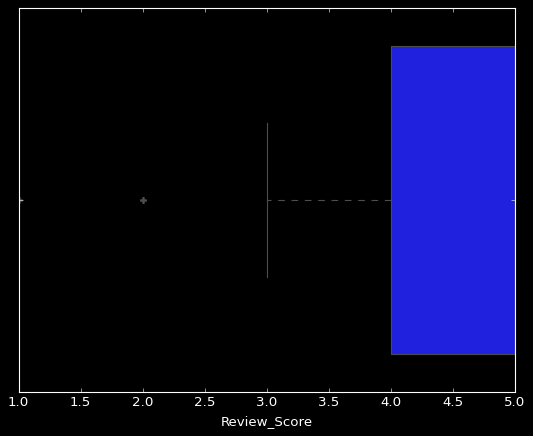

In [357]:
plt.style.use('dark_background')
q25, q75 = np.percentile(data['Review_Score'], (25,75))
iqr = q75 - q25 
min_1 = q25 - 1.5*iqr 
max_1 = q75 + 1.5*iqr
sns.boxplot(x=data['Review_Score']);

In [254]:
data['Review Score'].loc[data['Review Score'] < min_1].count()  # Count of review score outliers


14144

 * The count of review score outliers were almost 14% of the total count which is kinda significant. So for this reason we will retain these values for further analysis.

<Axes: xlabel='Total_Sales'>

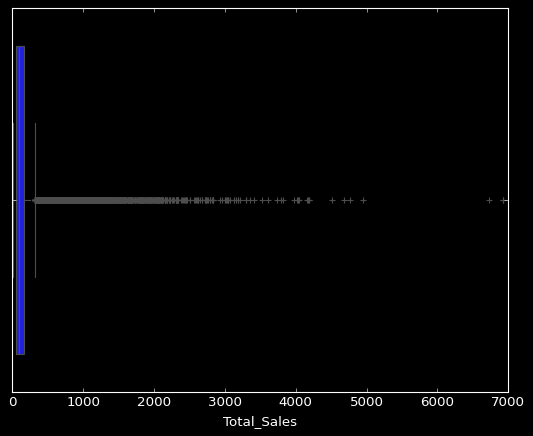

In [359]:
q25, q75 = np.percentile(data["Total_Sales"], (25,75))
iqr = q75 - q25 
min_2 = q25 - 1.5*iqr 
max_2 = q75 + 1.5*iqr
sns.boxplot(x=data["Total_Sales"])

In [360]:
data["Total_Sales"].loc[data["Total_Sales"] > max_2].count()  # Count of Total Sales outliers

7667

 * The count of total sales outliers were 7.4% of the total count which is also kinda significant. We will also retain these values for further analysis.

<Axes: xlabel='Payment_Value'>

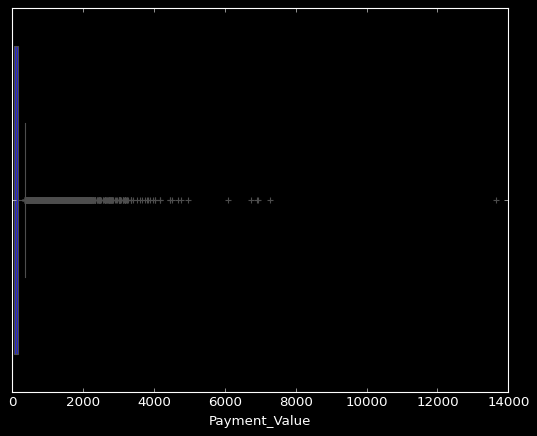

In [361]:
q25, q75 = np.percentile(data["Payment_Value"], (25,75))
iqr = q75 - q25 
min_3 = q25 - 1.5*iqr 
max_3 = q75 + 1.5*iqr
sns.boxplot(x=data["Payment_Value"])

In [363]:
data['Payment_Value'].loc[data['Payment_Value'] > max_3].count()  # Count of freight value outliers

7990

 * The count of payment value outliers were 7.7% of the total count which is also significant and can affect further analysis. We will also retain these value

In [364]:
data['Order_Purchase_Timestamp'] = pd.to_datetime(data['Order_Purchase_Timestamp'])  # Convert to datetime64 format 
data['Order_Delivered_Customer_Date'] = pd.to_datetime(data['Order_Delivered_Customer_Date']) 


In [173]:
# Exporting CSV file
data.to_csv("cleaned_data.csv") 

In [257]:
data.columns = data.columns.str.replace(' ', '_')

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104008 entries, 0 to 119142
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Order_Id                       104008 non-null  object        
 1   Product_Id                     104008 non-null  object        
 2   Seller_Id                      104008 non-null  object        
 3   Customer_Id                    104008 non-null  object        
 4   City                           104008 non-null  object        
 5   Country_State                  104008 non-null  object        
 6   Lat                            104008 non-null  float64       
 7   Long                           104008 non-null  float64       
 8   Order_Purchase_Timestamp       104008 non-null  datetime64[ns]
 9   Order_Delivered_Customer_Date  104008 non-null  datetime64[ns]
 10  Product_Category_Name          104008 non-null  object        
 11  Order

* Connecting to SQL Server (Exporting the cleaned data to SQL server)

In [28]:
import pyodbc 

In [29]:
conn = pyodbc.connect('DRIVER={ODBC Driver 18 for SQL Server};' 
                      'SERVER=LAPTOP-AK0PT9AH;' 
                      'DATABASE=olist_web_ecommerce;'
                      'UID=root;PWD=Tootsie@2714;'
                      'Trusted_connection=yes;'
                        'Encrypt=no')
cursor = conn.cursor()

In [31]:
# Create Table
sql = '''CREATE TABLE cleaned_data(Order_Id nvarchar(50), Product_Id nvarchar(50), Seller_Id nvarchar(50), Customer_Id nvarchar(50),
             City nvarchar(50),
            Country_State nvarchar(50),
            Lat float,
            Long float,
			Order_Purchase_Timestamp datetime2,
            Order_Delivered_Customer_Date datetime2,
            Product_Category_Name nvarchar(50),
            Order_Status nvarchar(50),
            Review_Score int,
            Payment_Type nvarchar(50),
            Payment_Value float
            )'''
cursor.execute(sql)


conn.commit()

In [32]:
# Insert DataFrame to Table
for row in data.itertuples():
    cursor.execute('''
                INSERT INTO cleaned_data (Order_Id, Product_Id, Seller_Id, Customer_Id,
             City,
            Country_State,
            Lat,
            Long,
			Order_Purchase_Timestamp,
            Order_Delivered_Customer_Date,
            Product_Category_Name,
            Order_Status,
            Review_Score,
            Payment_Type,
            Payment_Value)
                VALUES (?,?,?,?,?, ?,?,?,?,?,?,?,?,?,?)
                ''',
            row.Order_Id, 
            row.Product_Id, 
            row.Seller_Id, 
            row.Customer_Id,
            row.City,
            row.Country_Sate,
            row.Lat,
            row.Long,
			row.Order_Purchase_Timestamp,
            row.Order_Delivered_Customer_Date,
            row.Product_Category_Name,
            row.Order_Status,
            row.Review_Score,
            row.Payment_Type,
            row.Payment_Value
            )


conn.commit()

### **Exploratory Data Analysis** 
                 


In [176]:
data.head()

,Order_Id,Product_Id,Seller_Id,Customer_Id,City,Country_Sate,Lat,Long,Order_Purchase_Timestamp,Order_Delivered_Customer_Date,Product_Category_Name,Order_Status,Review_Score,Total_Sales,Payment_Type,Payment_Value
0,7eba0b6b5cb480d65416e26e2528d250,5fea1628f3d9680db59c20a4d80c221f,0761743cbffb25d7148189e9f1a5f03a,7b27139522c36a37118d6eb8402f1d85,Taboao da Serra,Sao Paulo,-23.6261,-46.7917,2017-11-30 09:38:21,2017-12-15 23:09:59,Beleza Saude,Delivered,4.0,47.010000,Boleto,235.050003
5,7f0d655ffe806d4ab4ade36bbaa8e71e,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,9716c4a296c261a120d27d058e32ab38,Juiz de Fora,Minas Gerais,-21.7642,-43.3503,2018-02-16 09:25:44,2018-03-02 15:09:38,Others,Delivered,5.0,138.599998,Credit Card,138.600006
6,7f4988e3479541a14ffd638419c902b1,2ae501b303a5a8e6f75c8c36f366b2d5,4e06067cc08b3f41d837768d392c3ee3,f4647aea7ef7c8dfb11e2970c509f8f9,Buritizeiro,Minas Gerais,-17.3511,-44.9622,2017-07-16 15:27:12,2017-07-18 18:47:40,Perfumaria,Delivered,5.0,32.469999,Credit Card,32.470001
7,7f6945b2c635db3bce1cfb585ba82d33,514171f9d45a3d93574fc587ef775579,d91fb3b7d041e83b64a00a3edfb37e4f,e0b51ab4363c175e59f94dd700050a67,Nilopolis,Rio de Janeiro,-22.9028,-43.4139,2018-07-27 09:52:08,2018-08-02 23:03:29,Portateis Casa Forno E Cafe,Delivered,5.0,53.539999,Credit Card,53.540001
8,80033798e6e3df555110ccfb54fca308,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,be92c9ed86442988b4c15f71a8f351c0,Itaguai,Rio de Janeiro,-22.8522,-43.7753,2017-12-19 14:16:19,2018-01-11 16:56:56,Others,Delivered,5.0,137.599998,Credit Card,137.600006


In [177]:
total_sales = data['Payment_Value'].sum()
total_sales

16366106.999373794

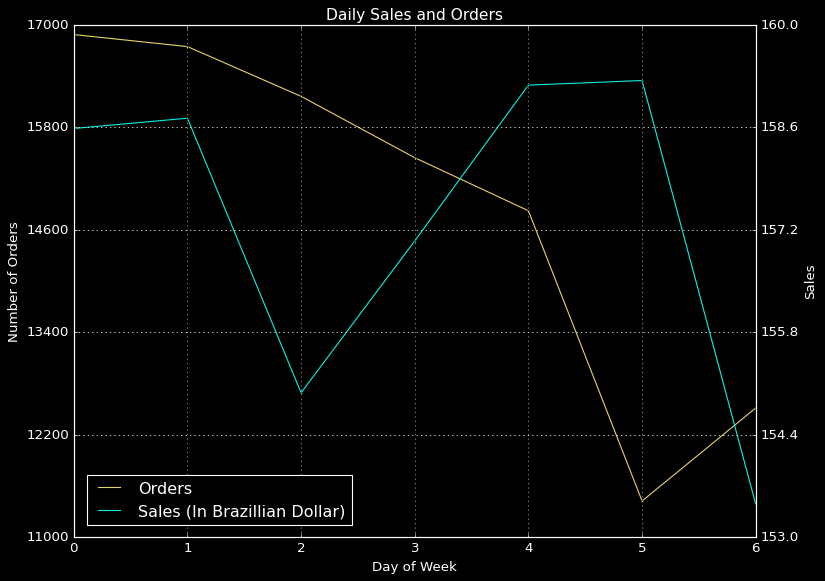

In [372]:
daily_order = data.loc[data['Order_Status'] == 'Delivered'].groupby(data['Order_Purchase_Timestamp'].dt.dayofweek)[['Order_Id']].count()

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(11,8));
ax.plot(daily_order.index, daily_order['Order_Id'], color = '#E8D166', label = 'Orders');
ax.plot(daily_order.index, daily_order['Order_Id'], 'o', markersize = 2, color = '#E8D166');
ax.set_ylabel("Number of Orders");
ax.set_xlabel('Day of Week');
ax.grid(None) 
plt.grid(which = 'both', linestyle='dotted')

ax.set_ylim(11000,17000)
ax.set_yticks(np.linspace(11000,17000, 6))


ax2 = ax.twinx()

daily_sales = data.loc[data['Order_Status'] == 'Delivered'].groupby(data['Order_Purchase_Timestamp'].dt.dayofweek)[['Payment_Value']].mean()
daily_sales

ax2.plot(daily_sales.index, daily_sales['Payment_Value'], c='#0CEEE3', label = 'Sales (In Brazillian Dollar)');
ax2.plot(daily_sales.index, daily_sales['Payment_Value'], 'o', markersize = 2, color = '#0CEEE3');
ax2.set_ylabel("Sales");
ax2.set_title('Daily Sales and Orders', fontsize = 14);
fig.legend(bbox_to_anchor = (0.45, 0.21));

# disable the grid of axis 2
ax2.grid(None) 

ax2.set_ylim(153,160);
ax2.set_yticks(np.linspace(153,160, 6));



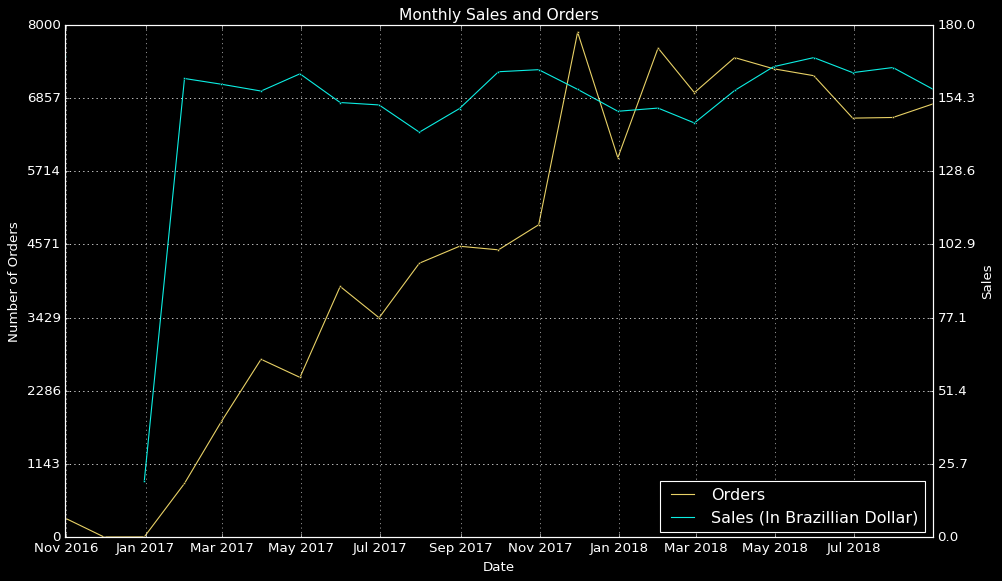

In [374]:
monthly_order = data.loc[data['Order_Status'] == 'Delivered'].set_index('Order_Purchase_Timestamp').loc[:, ['Order_Id']].resample('M').count()

fig, ax = plt.subplots(figsize=(14,8));
ax.plot(monthly_order.index, monthly_order['Order_Id'], color = '#E8D166', label = 'Orders');
ax.plot(monthly_order.index, monthly_order['Order_Id'], 'o', markersize = 2, color = '#E8D166');
ax.set_ylabel("Number of Orders");
ax.set_xlabel('Date');
ax.grid(None) 
plt.grid(which = 'both', linestyle='dotted')
ax.set_ylim(0,8000)
ax.set_yticks(np.linspace(0,8000, 8))


ax2 = ax.twinx()

monthly_sales = data.loc[data['Order_Status'] == 'Delivered'].set_index('Order_Purchase_Timestamp').loc[:, ['Payment_Value']].resample('M').mean()


ax2.plot(monthly_sales.index, monthly_sales['Payment_Value'], c='#0CEEE3', label = 'Sales (In Brazillian Dollar)');
ax2.plot(monthly_sales.index, monthly_sales['Payment_Value'], 'o', markersize = 2, color = '#0CEEE3' );
ax2.set_ylabel("Sales");
ax2.set_title('Monthly Sales and Orders', fontsize = 14);
fig.legend(bbox_to_anchor = (0.9, 0.2));

ax2.grid(None) 

ax2.set_ylim(0,160);
ax2.set_yticks(np.linspace(0,180, 8));

####
 * Product Categories with the Most Orders

In [112]:
high_category = data.groupby('Product_Category_Name')[['Order_Id']].count().sort_values('Order_Id', ascending=False).reset_index() # Getting the product category with the most sales
high_category.head()

,Product_Category_Name,Order_Id
0,Cama Mesa Banho,10614
1,Beleza Saude,9038
2,Esporte Lazer,7900
3,Moveis Decoracao,6963
4,Informatica Acessorios,6944


####
 * Product Categories with the Least Orders

In [115]:
low_category = data.groupby('Product_Category_Name')[['Order_Id']].count().sort_values('Order_Id', ascending=True).reset_index()
low_category.head()

,Product_Category_Name,Order_Id
0,Seguros E Servicos,2
1,Fashion Roupa Infanto Juvenil,7
2,Pc Gamer,8
3,Cds Dvds Musicais,12
4,Portateis Cozinha E Preparadores De Alimentos,13


####
 * Average Time of Delivery CategoryWise

In [116]:
delivery_analysis = data.loc[:, ('Order_Purchase_Timestamp', 'Order_Delivered_Customer_Date', 'Order_Id', 'Product_Category_Name', 'Review_Score')]
delivery_analysis['Delivery_Difference'] = delivery_analysis['Order_Delivered_Customer_Date'] - delivery_analysis['Order_Purchase_Timestamp']
delivery_analysis['Delivery_Difference'] = delivery_analysis['Delivery_Difference'].dt.days.astype('int')  # Extract Days from time_delta
delivery_analysis.head()

,Order_Purchase_Timestamp,Order_Delivered_Customer_Date,Order_Id,Product_Category_Name,Review_Score,Delivery_Difference
0,2017-11-30 09:38:21,2017-12-15 23:09:59,7eba0b6b5cb480d65416e26e2528d250,Beleza Saude,4.0,15
5,2018-02-16 09:25:44,2018-03-02 15:09:38,7f0d655ffe806d4ab4ade36bbaa8e71e,Others,5.0,14
6,2017-07-16 15:27:12,2017-07-18 18:47:40,7f4988e3479541a14ffd638419c902b1,Perfumaria,5.0,2
7,2018-07-27 09:52:08,2018-08-02 23:03:29,7f6945b2c635db3bce1cfb585ba82d33,Portateis Casa Forno E Cafe,5.0,6
8,2017-12-19 14:16:19,2018-01-11 16:56:56,80033798e6e3df555110ccfb54fca308,Others,5.0,23


In [118]:
product_category_delivery = delivery_analysis.groupby('Product_Category_Name')[['Delivery_Difference']].mean().sort_values(by='Delivery_Difference', ascending = False)
product_category_delivery = product_category_delivery.head()
product_category_delivery

,Delivery_Difference
Product_Category_Name,
Moveis Escritorio,20.301349
Artigos De Natal,15.046512
Seguros E Servicos,15.000000
Fashion Calcados,14.909774
Moveis Colchao E Estofado,13.700000


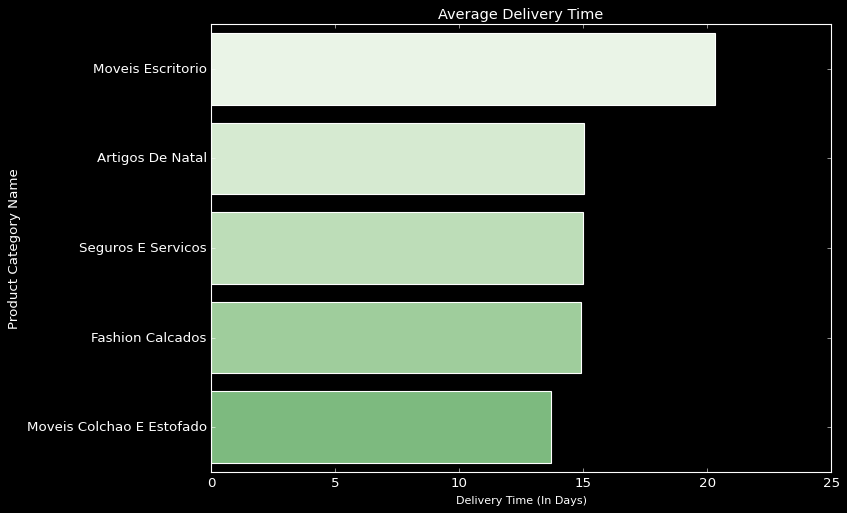

In [375]:
fig, ax = plt.subplots(figsize=(10,7));

norm = plt.Normalize(product_category_delivery["Delivery_Difference"].values.min(), product_category_delivery["Delivery_Difference"].values.max());
gradient = sns.color_palette("Greens", 9)


sns.barplot(data=product_category_delivery, y=product_category_delivery.index, x=product_category_delivery['Delivery_Difference'], palette = gradient);
ax.set_title('Average Delivery Time', fontsize=13);
ax.set_xlabel('Delivery Time (In Days)', fontsize=10);
ax.set_ylabel('Product Category Name');

####
 * Customer Life Time Value Analysis

In [178]:
clv = data.groupby('Product_Category_Name').agg({'Order_Id':'count', 'Payment_Value':'mean'}).reset_index()
clv['Customer_LifeTime_Value'] = clv['Payment_Value'] * clv['Order_Id'] * 2  #Assigning a column for Average Order Value
clv = clv.sort_values(by='Customer_LifeTime_Value', ascending=False)
clv = clv.head()
clv

,Product_Category_Name,Order_Id,Payment_Value,Customer_LifeTime_Value
11,Beleza Saude,9038,161.675067,2.922439e+06
13,Cama Mesa Banho,10614,135.671587,2.880036e+06
67,Relogios Presentes,5829,223.587066,2.606578e+06
32,Esporte Lazer,7900,147.212958,2.325965e+06
44,Informatica Acessorios,6944,160.746879,2.232453e+06


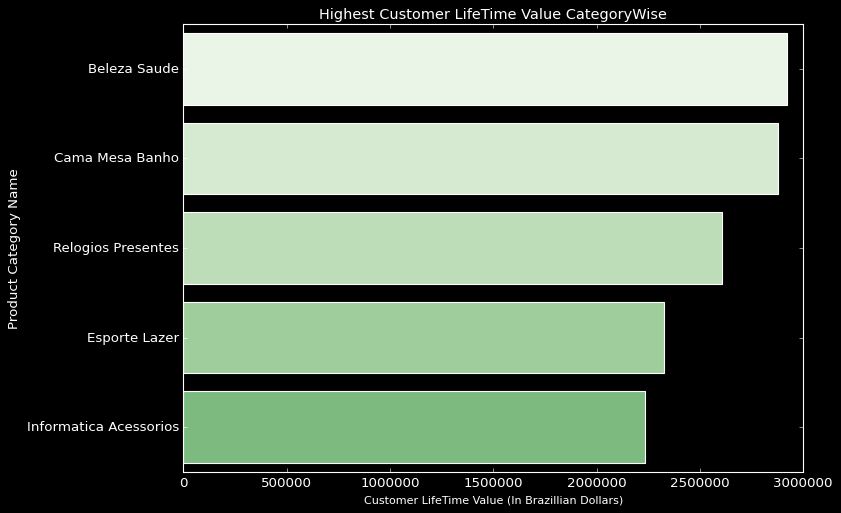

In [409]:
fig, ax = plt.subplots(figsize=(10,7));

norm = plt.Normalize(clv["Customer_LifeTime_Value"].values.min(), clv["Customer_LifeTime_Value"].values.max());
gradient = sns.color_palette("Greens", 9);

sns.barplot(data=clv, y=clv['Product_Category_Name'], x=clv["Customer_LifeTime_Value"], palette=gradient);
ax.set_title('Highest Customer LifeTime Value CategoryWise', fontsize=13);
ax.set_xlabel('Customer LifeTime Value (In Brazillian Dollars)', fontsize=10);
ax.set_ylabel('Product Category Name');

 * Preferred Payment Methods of the Customers

In [336]:
type_of_payment = data.groupby('Payment_Type')[['Order_Id']].count().sort_values(by='Order_Id', ascending=False).astype({'Order_Id':'float'})
type_of_payment

,Order_Id
Payment_Type,
Credit Card,77477.0
Boleto,19850.0
Voucher,5134.0
Debit Card,1547.0


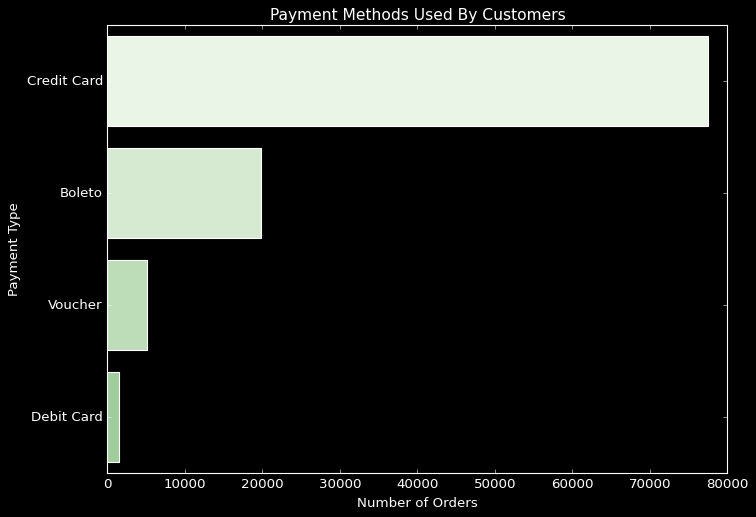

In [410]:
fig, ax = plt.subplots(figsize=(10,7));

gradient = sns.color_palette("Greens", 9);

sns.barplot(data=type_of_payment, x=type_of_payment["Order_Id"], y=type_of_payment.index, palette=gradient);
ax.set_title('Payment Methods Used By Customers', fontsize=14);
ax.set_ylabel('Payment Type', fontsize=12);
ax.set_xlabel('Number of Orders', fontsize=12);

* Most Number of Sales by Location

In [260]:
data.head()

,Order_Id,Product_Id,Seller_Id,Customer_Id,City,Country_State,Lat,Long,Order_Purchase_Timestamp,Order_Delivered_Customer_Date,Product_Category_Name,Order_Status,Review_Score,Total_Sales,Payment_Type,Payment_Value
0,7eba0b6b5cb480d65416e26e2528d250,5fea1628f3d9680db59c20a4d80c221f,0761743cbffb25d7148189e9f1a5f03a,7b27139522c36a37118d6eb8402f1d85,Taboao da Serra,Sao Paulo,-23.6261,-46.7917,2017-11-30 09:38:21,2017-12-15 23:09:59,Beleza Saude,Delivered,4.0,47.010000,Boleto,235.050003
5,7f0d655ffe806d4ab4ade36bbaa8e71e,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,9716c4a296c261a120d27d058e32ab38,Juiz de Fora,Minas Gerais,-21.7642,-43.3503,2018-02-16 09:25:44,2018-03-02 15:09:38,Others,Delivered,5.0,138.599998,Credit Card,138.600006
6,7f4988e3479541a14ffd638419c902b1,2ae501b303a5a8e6f75c8c36f366b2d5,4e06067cc08b3f41d837768d392c3ee3,f4647aea7ef7c8dfb11e2970c509f8f9,Buritizeiro,Minas Gerais,-17.3511,-44.9622,2017-07-16 15:27:12,2017-07-18 18:47:40,Perfumaria,Delivered,5.0,32.469999,Credit Card,32.470001
7,7f6945b2c635db3bce1cfb585ba82d33,514171f9d45a3d93574fc587ef775579,d91fb3b7d041e83b64a00a3edfb37e4f,e0b51ab4363c175e59f94dd700050a67,Nilopolis,Rio de Janeiro,-22.9028,-43.4139,2018-07-27 09:52:08,2018-08-02 23:03:29,Portateis Casa Forno E Cafe,Delivered,5.0,53.539999,Credit Card,53.540001
8,80033798e6e3df555110ccfb54fca308,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,be92c9ed86442988b4c15f71a8f351c0,Itaguai,Rio de Janeiro,-22.8522,-43.7753,2017-12-19 14:16:19,2018-01-11 16:56:56,Others,Delivered,5.0,137.599998,Credit Card,137.600006


In [261]:
number_of_orders_per_city = data.groupby('Country_State')[['Order_Id']].count().sort_values(by='Order_Id', ascending=False).head()
number_of_orders_per_city

,Order_Id
Country_State,
Sao Paulo,43636
Rio de Janeiro,13490
Minas Gerais,12204
Rio Grande do Sul,5751
Parana,5250


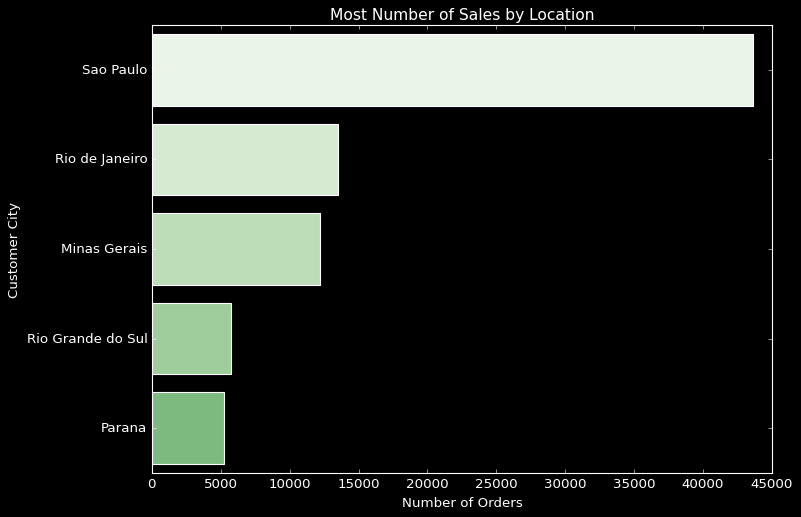

In [411]:
fig, ax = plt.subplots(figsize=(10,7));

gradient = sns.color_palette("Greens", 9);

sns.barplot(data=number_of_orders_per_city, x=number_of_orders_per_city["Order_Id"], y=number_of_orders_per_city.index, palette=gradient);
ax.set_title('Most Number of Sales by Location', fontsize=14);
ax.set_ylabel('Customer City', fontsize=12);
ax.set_xlabel('Number of Orders', fontsize=12);

* Customer Satisfaction Based On Review Scores

In [412]:
review_scores = delivery_analysis.groupby('Product_Category_Name').agg({'Review_Score':'mean','Delivery_Difference':'mean'}).sort_values(by='Review_Score', ascending=True)
review_scores['Review_Score'] = review_scores['Review_Score'].round(decimals=2) #round to two decimal places 
review_scores['Delivery_Difference'] = review_scores['Delivery_Difference'].round(decimals=2) #round to two decimal places

In [413]:
review_scores.sort_values(by='Review_Score', ascending = False).head()

,Review_Score,Delivery_Difference
Product_Category_Name,,
Fashion Roupa Infanto Juvenil,5.00,8.14
Cds Dvds Musicais,4.67,10.50
Livros Importados,4.52,7.97
Livros Interesse Geral,4.51,11.30
Alimentos Bebidas,4.47,10.31


In [414]:
review_scores.corr()  # No strong correlation between the two variables

,Review_Score,Delivery_Difference
Review_Score,1.00000,-0.37963
Delivery_Difference,-0.37963,1.00000


In [415]:
high_review_scores = review_scores.sort_values(by='Review_Score', ascending = False).head(5)
high_review_scores  # Product Categories with High Customer Review Scores

,Review_Score,Delivery_Difference
Product_Category_Name,,
Fashion Roupa Infanto Juvenil,5.00,8.14
Cds Dvds Musicais,4.67,10.50
Livros Importados,4.52,7.97
Livros Interesse Geral,4.51,11.30
Alimentos Bebidas,4.47,10.31


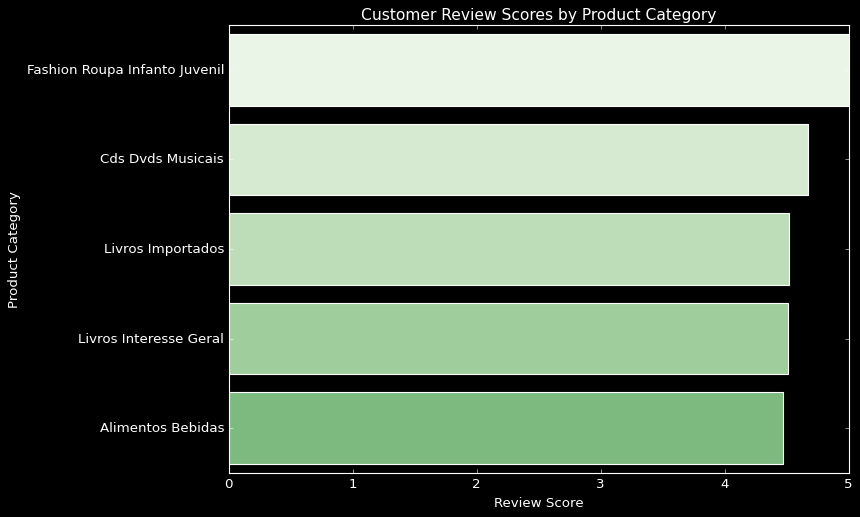

In [416]:
fig, ax = plt.subplots(figsize=(10,7));

gradient = sns.color_palette("Greens", 9);

sns.barplot(data=high_review_scores, x=high_review_scores["Review_Score"], y=high_review_scores.index, palette=gradient);
ax.set_title('Customer Review Scores by Product Category', fontsize=14);
ax.set_ylabel('Product Category', fontsize=12);
ax.set_xlabel('Review Score', fontsize=12);

In [417]:
 # Product Categories with Low Customer Review Scores
low_review_scores = review_scores.sort_values(by='Review_Score', ascending = True).head()

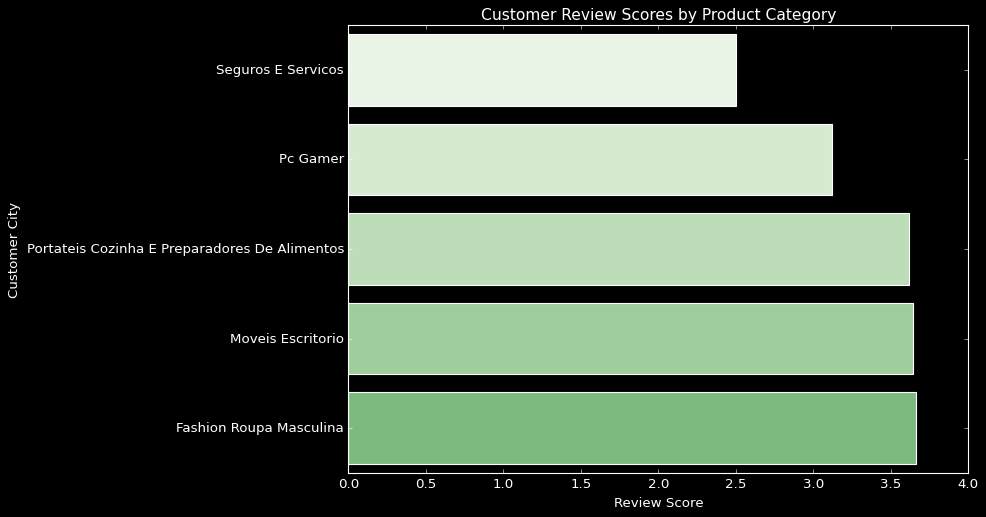

In [418]:
fig, ax = plt.subplots(figsize=(10,7));

gradient = sns.color_palette("Greens", 9);

sns.barplot(data=low_review_scores, x=low_review_scores["Review_Score"], y=low_review_scores.index, palette=gradient);
ax.set_title('Customer Review Scores by Product Category', fontsize=14);
ax.set_ylabel('Customer City', fontsize=12);
ax.set_xlabel('Review Score', fontsize=12);

In [426]:
# Total Sales Revenue
total_sales = data['Payment_Value'].sum().round(0)
total_sales

16366107.0

In [427]:
# Total Orders
total_orders = data['Order_Id'].count()
total_orders

104008

In [431]:
# Customer Satisfaction Rate
rate = data['Order_Id'].loc[data['Review_Score'].isin([4,5])].count() / data['Order_Id'].count()
rate.round(2)

0.78